# t-tests for Experimentation Analytics:
## Compare means in A/B Testing
This notebook illustrates **t-tests** for A/B testing in user growth analytics. It includes explanations of purpose, logic, and math, with Python implementations and visualizations.

## Purpose

A **t-test** compares the means of two groups to determine if they are significantly different, ideal for continuous outcomes in A/B tests. We test if a new onboarding UI increases average user transaction amounts (continuous variable).

## Logic and Math

- **Logic**: The t-test measures how far apart the sample means are relative to their variability (standard error). A small p-value (< 0.05) indicates significant difference, rejecting the null hypothesis (means are equal).
- **Welch's formula (independent 2-sample t-test)**:
  $$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$
  - $\bar{X}_1, \bar{X}_2$: sample means of control and treatment groups.
  - $s_1^2, s_2^2$: sample variances.
  - $n_1, n_2$: sample sizes.
- **Degrees of Freedom (DoF)**:
  $$df \approx \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}}$$
- **P-value**: Derived from the t-distribution, indicates significance.

## Example: Transaction Amount A/B Test

We simulate transaction amounts for 100 users in a control group (old UI) and 100 users in a treatment group (new UI). Our hypothesis is that the new UI increases spending.

t-statistic: -3.7250
P-value: 0.0006
Mean Control: 95.49, Mean Treatment: 111.84
Reject null hypothesis: New UI significantly affects transaction amounts.


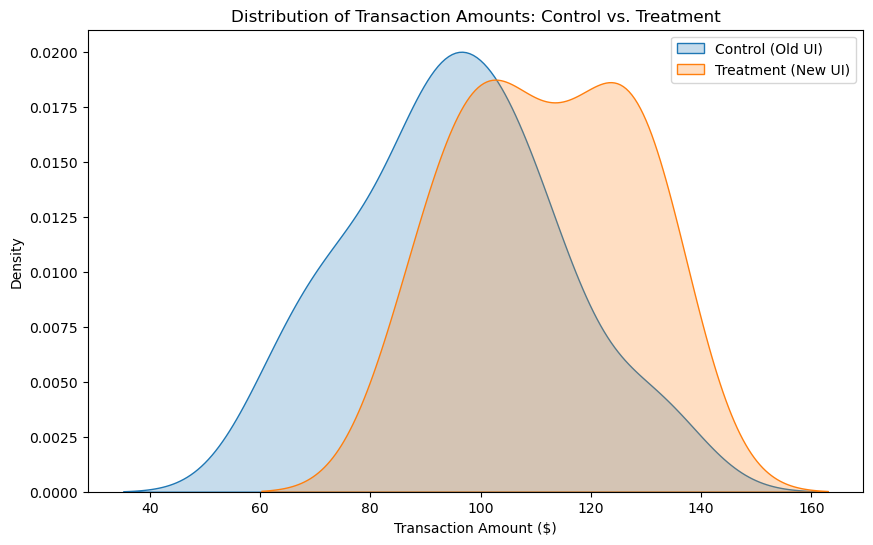

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data: transaction amounts (USD)
control = np.random.normal(100, 20, size=50)  # Control: mean=100, std=20
treatment = np.random.normal(110, 20, size=20)  # Treatment: mean=110, std=20

# Perform Welch’s t-test (unequal variances)
t_stat, p_value = ttest_ind(control, treatment, equal_var=False)

# Print results
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean Control: {np.mean(control):.2f}, Mean Treatment: {np.mean(treatment):.2f}")
if p_value < 0.05:
    print("Reject null hypothesis: New UI significantly affects transaction amounts.")
else:
    print("Fail to reject null hypothesis: No significant effect.")

# Plot results
plt.figure(figsize=(10, 6))
sns.kdeplot(control, label='Control (Old UI)', fill=True)
sns.kdeplot(treatment, label='Treatment (New UI)', fill=True)
plt.title('Distribution of Transaction Amounts: Control vs. Treatment')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

**Output Interpretation**:
- **t-statistic**: Measures the difference between means relative to variability.
- **P-value**: If < 0.05, the new UI significantly increases transaction amounts.
- **Plot**: Kernel density plots show the distribution of transaction amounts, highlighting any shift in means.

## Conclusion

- **t-tests**: Ideal for continuous outcomes (e.g., transaction amounts), using the t-statistic to compare means.
- **Application**: Support experimentation focus, enabling data-driven decisions for user growth (e.g., optimizing onboarding, referral programs).